In [ ]:
!pip install ktrain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ktrain
from ktrain import text

     |████████████████████████████████| 25.3 MB 98 kB/s 
     |████████████████████████████████| 6.8 MB 41.7 MB/s 
     |████████████████████████████████| 981 kB 42.2 MB/s 
     |████████████████████████████████| 263 kB 52.1 MB/s 
     |████████████████████████████████| 1.9 MB 36.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 468 kB 64.9 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
     |████████████████████████████████| 3.3 MB 33.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=add61a4aeeb4921824232b77e17eff53832c7f9a6205da386f41c229e5ea74ae
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=f530ea41c1b12911e263df145966b8b728c8ec93f132c20d5a6790472f275d3d
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ResearchData/EmojiData.xlsx')

In [ ]:
data.isnull().sum()


Date        0
Comments    0
Category    0
Emoji       0
dtype: int64

In [ ]:
len(data)
print(data.shape)

(199, 4)


In [ ]:
data.sort_values(by='Emoji', axis=0, inplace=True)

data.set_index(keys=['Emoji'], drop=False,inplace=True)

Emojis=data['Emoji'].unique().tolist()

In [ ]:
data_train = pd.read_excel('/content/drive/MyDrive/ResearchData/EmojiData.xlsx')
data_train['Comments'] = data_train['Comments'].astype(str)

data_test = pd.read_excel('/content/drive/MyDrive/ResearchData/EmojiData.xlsx')
data_test['Comments'] = data_train['Comments'].astype(str)


x_train = data_train.Comments.tolist()
x_test = data_test.Comments.tolist()

y_train = data_train.Emoji.tolist()
y_test = data_test.Emoji.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['💁', '🤦', '🤷']

print('size of training set: %s' % (len(data_train['Comments'])))
print('size of validation set: %s' % (len(data_test['Comments'])))
print(data.Emoji.value_counts())

data.head(10)

size of training set: 199
size of validation set: 199
🤷    160
💁    122
🤦    116
Name: Emoji, dtype: int64


,Date,Comments,Category,Emoji
0,2021-07-01,পৃথিবীতে যত রাস্তার শিশু রয়েছে সেখানে তাদের থ...,neutral,🤷
1,2021-07-01,শিশুদের জেনে জোর করে তাদের জানানো একমাত্র বাড়...,neutral,🤷
2,2021-07-01,রাস্তায় সংযুক্ত শিশুরা নির্যাতনকারীরা শোষণের ...,negative,🤦
3,2021-07-01,"শিশু শব্দটার সাথে মিশে আছে ভালোবাসা, আদর এবং ম...",positive,💁
4,2021-07-01,আমাদের দেশে পথশিশুর সংখ্যা দিন দিন বাড়ছে।,negative,🤦
5,2021-07-01,একশ্রেণির অশিক্ষিত ও দরিদ্র মানুষ অপরিকল্পিতভা...,negative,🤦
6,2021-07-01,"কিন্তু শিশুদের যখন পথশিশু, টোকাই, রাস্তার ছেলে...",neutral,🤷
7,2021-07-01,শিশুবান্ধব শহুরে পরিবেশ তৈরি এবং নগর কর্তৃপক্ষ...,neutral,🤷
8,2021-07-01,পথশিশুদের ৫১ ভাগ ‘অশ্লীল কথার শিকার’ হয়।,negative,🤦
9,2021-07-01,সবচেয়ে বেশি যৌন হয়রানির শিকার হয় মেয়েশিশু।,negative,🤦


In [ ]:

encoding = {
    '💁': 0,
    '🤦': 1,
    '🤷': 2,
}
 # encoding = encoding.MultipartEncoder('utf-8')
 # Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'albert-base-v2'

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen=500, classes=class_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:420: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: bn
train sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 26


Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 12
	95percentile : 22
	99percentile : 26


Downloading:   0%|          | 0.00/63.0M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=2)

In [ ]:
hist= learner.fit_onecycle(2e-5, 8)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/8
100/100 [==============================] - 1237s 12s/step - loss: 1.1211 - accuracy: 0.3518 - val_loss: 1.0876 - val_accuracy: 0.4020
Epoch 2/8
100/100 [==============================] - 1210s 12s/step - loss: 1.1190 - accuracy: 0.3065 - val_loss: 1.0932 - val_accuracy: 0.4020
Epoch 3/8
100/100 [==============================] - 1218s 12s/step - loss: 1.1329 - accuracy: 0.3417 - val_loss: 1.0974 - val_accuracy: 0.4020
Epoch 4/8
100/100 [==============================] - 1235s 12s/step - loss: 1.1213 - accuracy: 0.3568 - val_loss: 1.0908 - val_accuracy: 0.4020
Epoch 5/8
100/100 [==============================] - 1205s 12s/step - loss: 1.1150 - accuracy: 0.3317 - val_loss: 1.1034 - val_accuracy: 0.4271
Epoch 6/8
100/100 [==============================] - 1196s 12s/step - loss: 1.1037 - accuracy: 0.3819 - val_loss: 1.0908 - val_accuracy: 0.4221
Epoch 7/8
100/100 [==============================] - 1207s 12s/step - los

In [ ]:
learner.validate(val_data=val, class_names= class_names)

              precision    recall  f1-score   support

           💁       0.00      0.00      0.00        61
           🤦       0.00      0.00      0.00        58
           🤷       0.40      1.00      0.57        80

    accuracy                           0.40       199
   macro avg       0.13      0.33      0.19       199
weighted avg       0.16      0.40      0.23       199



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  0, 61],
       [ 0,  0, 58],
       [ 0,  0, 80]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.get_classes()

['💁', '🤦', '🤷']

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

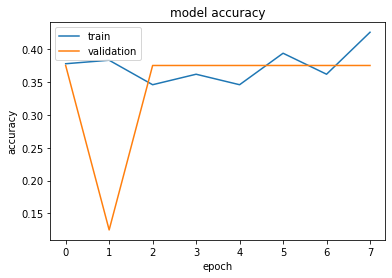

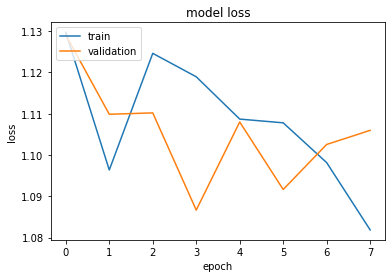

In [ ]:

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
predictions = [predictor.predict(pred) for pred in x_test]
print(precision_recall_fscore_support(data_test.Emoji, predictions, average='weighted', warn_for=('precision','recall','fscore') , zero_division= 'warn'))

(0.13109393579072534, 0.3620689655172414, 0.1924923614142296, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



F1 Score: 32.32


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129335 missing from current font.
  font.se

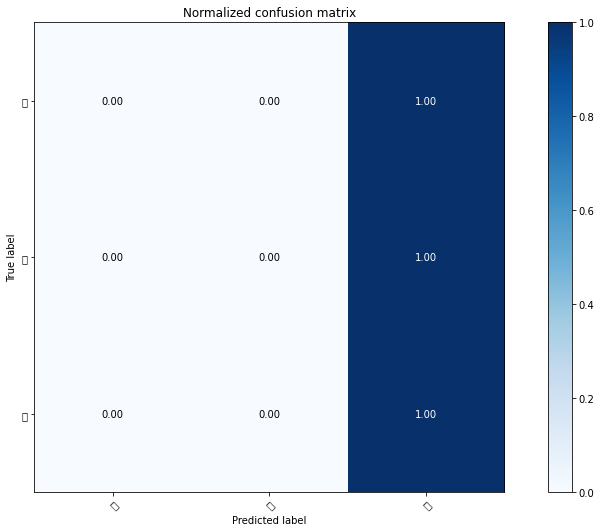

Message: শৃঙ্খলা, লক্ষ্য, গঠন, পদ্ধতি বা ফলাফলগুলির সাথে সংশ্লিষ্ট হওয়ার অনুভূতিই হল শিক্ষা দর্শনের আলোচ্য বিষয়
Predicted: 🤷


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emoji, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Emoji, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

print('Message: {}\nPredicted: {}'.format(x_test[22], predictions[22]))

In [ ]:
import time 

message = 'শিশু অপহরণ একটি বড় ধরনের সমস্যা'

start_time = time.time() 
prediction = predictor.predict(message)

if prediction == '0':
  print('💁')
if prediction == '1':
  print('🤦')
if prediction == '2':
  print('🤷')

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: 🤷 (0.19)


In [ ]:
predictor.save("models/roberta_model")